# Using Regression Models to Predict Listing Price and Listing Availibility
## By Daniel Guthrie


# Business Understanding

- Create models that are useful for Inside Airbnb: a company that advocates against the adverse effects of short-term rentals.

# Data Understanding 

- Exploratory data analysis and data visualization of the provided datasets
- Leverage linear regression methods and models to predict a listing price ['price']
- Leverage random forest regression to predict whether or not a listing will have availibility

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
mm = preprocessing.MinMaxScaler()
rb = preprocessing.RobustScaler()
nm = preprocessing.Normalizer()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Importing Data

In [2]:
calendar_df = pd.read_csv('data/calendar.csv', low_memory = False)
hosts_df = pd.read_csv('data/hosts.csv', low_memory = False)
listings_df = pd.read_csv('data/listings.csv', low_memory = False)
reviews_df = pd.read_csv('data/reviews.csv', low_memory = False)
listings_review_df =pd.read_csv('data/listings_review.csv', low_memory = False)
cal_listings_df =pd.read_csv('data/cal_listings.csv', low_memory = False)

## Viewing Data

In [3]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


In [4]:
hosts_df.head()

,Unnamed: 0,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,response_few_days,response_few_hours,response_within_day,response_within_hour,host_id,reviews_per_month,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,0,Marilyn,4702.0,NaN,NaN,0,NaN,1.0,1.0,1,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1147,0.00,0,0,1,0
1,1,Jack,4538.0,NaN,NaN,0,NaN,1.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,6383,0.14,1,0,0,0
2,2,Michele,4455.0,NaN,19%,1,NaN,0.0,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,12172,4.69,0,0,1,0
3,3,Diana,4378.0,100%,56%,1,NaN,16.0,16.0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,22296,2.82,0,0,6,1
4,4,Russ,4299.0,50%,71%,0,NaN,0.0,0.0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,36601,0.24,1,0,1,0


In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20210219004252,2021-02-20,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,19%,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17315,-86.73581,Private room in house,Private room,2,NaN,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",$40.00,30,365,30,30,365,365,30.0,365.0,NaN,t,3,3,3,267,2021-02-20,674,6,0,2009-04-30,2020-03-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,4.69
1,25613,https://www.airbnb.com/rooms/25613,20210219004252,2021-02-20,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,https://a0.muscache.com/pictures/60aa90fe-1b3f...,95811,https://www.airbnb.com/users/show/95811,Nell,2010-03-18,"Nashville, Tennessee, United States",My husband Michael and I are part of a communi...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/95811/profile...,https://a0.muscache.com/im/users/95811/profile...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17826,-86.74162,Private room in house,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",$75.00,2,30,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,63,2021-02-20,510,4,0,2010-04-25,2020-03-14,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,0,1,0,3.87
2,136015,https://www.airbnb.com/rooms/136015,20210219004252,2021-02-20,Apart. on the Ridge near Opryland,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,https://a0.muscache.com/pictures/2739438/005be...,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,2011-06-05,"Nashville, Tennessee, United States","We Love God, people, hosting and art! Our stro...",a few days or more,0%,0%,f,https://a0.muscache.com/im/users/666322/profil...,https://a0.muscache.com/im/users/666322/profil...,NaN,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Nashville, Tennessee, United States",District 15,NaN,36.19464,-86.67195,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Washer...",$103.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,0,0,0

In [6]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


### Getting sample of 'cal_listings' for time sake

In [7]:
cal_listings_df_sample = cal_listings_df.sample(frac=0.3, random_state=42)

In [8]:
cal_listings_df_sample

,listing_id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,am_Wifi,am_Smokealarm,am_Heating,am_Airconditioning,am_TV,am_Essentials,am_Hairdryer,am_Iron,am_Hangers,am_Kitchen,am_Longtermstaysallowed,am_Shampoo,am_Freeparkingonpremises,am_Coffeemaker,am_Dryer,am_Washer,am_Hotwater,am_Carbonmonoxidealarm,am_Dedicatedworkspace,am_Refrigerator,am_Fireextinguisher,am_Microwave,am_Dishesandsilverware,am_Cookingbasics,am_Oven,am_Privateentrance,am_Stove,am_Bedlinens,am_Dishwasher,am_Patioorbalcony,am_Firstaidkit,am_Extrapillowsandblankets,am_Freestreetparking,am_CableTV,am_Keypad,am_Gardenorbackyard,am_Bathtub,am_Luggagedropoffallowed,am_BBQgrill,am_Pool,am_Gym,am_Smartlock,am_Showergel,am_Bakingsheet,am_Elevator,am_Indoorfireplace,am_Room-darkeningshades,am_Singlelevelhome,am_Pack\u2019nPlay/travelcrib,am_Lockbox,am_Freezer,am_Bodysoap,am_Breakfast,am_Ceilingfan,am_Conditioner,am_Ethernetconnection,am_Lockonbedroomdoor,am_Children\u2019sbooksandtoys,am_Hottub,am_Highchair,am_Barbecueutensils,am_Keurigcoffeemachine,am_Paidparkingonpremises,am_Paidparkingoffpremises,am_Babysitterrecommendations,am_Bathroomessentials,am_Bedroomcomforts,am_Wineglasses,am_Toaster,am_Selfcheck-in,am_Cleaningbeforecheckout,am_Diningtable,am_Outdoorfurniture,am_Children\u2019sdinnerware,am_Cleaningproducts,am_EVcharger,am_Fullkitchen,am_Pocketwifi,am_Buildingstaff,am_Outletcovers,am_Portablefans,am_Crib,am_Laundromatnearby,am_Hostgreetsyou,am_Babysafetygates,am_Gameconsole,am_Outdoordiningarea,hv_None,hv_email,hv_facebook,hv_google,hv_government_id,hv_identity_manual,hv_jumio,hv_kba,hv_manual_offline,hv_manual_online,hv_offline_government_id,hv_phone,hv_photographer,hv_reviews,hv_selfie,hv_sent_id,hv_work_email,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room,dist_1,dist_10,dist_11,dist_12,dist_13,dist_14,dist_15,dist_16,dist_17,dist_18,dist_19,dist_2,dist_20,dist_21,dist_22,dist_23,dist_24,dist_25,dist_26,dist_27,dist_28,dist_29,dist_3,dist_30,dist_31,dist_32,dist_33,dist_34,dist_35,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9,response_few_days,response_few_hours,response_within_day,response_within_hour,host_local,cal_available,cal_price,cal_minimum_nights,cal_maximum_nights,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2021,year_2022
1006826,33069060,"Music City Studio C, Music Row, Nashville, TN",Welcome to Nashville Music City Studio Unit C ...,160355269,DeAnn,1291.0,98%,99%,1,NaN,4.0,4.0,1,0,"Nashville, Tennessee, United States",36.14430,-86.79492,Entire cottage,Entire home/apt,8,2.0,3.0,4.0,152.0,3,21,1,17,27,35,97,68,23,0,801.0,156.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,3,3,0,0,2.95,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,105.0,3.0,1125.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
540280,20916469,Qui

### Exploring the Cal Listings Dataframe

In [9]:
cal_listings_df_sample.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 560915 entries, 1006826 to 92975
Data columns (total 222 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    listing_id                                    int64  
 1    name                                          object 
 2    description                                   object 
 3    host_id                                       int64  
 4    host_name                                     object 
 5    host_since                                    float64
 6    host_response_rate                            object 
 7    host_acceptance_rate                          object 
 8    host_is_superhost                             int64  
 9    host_neighbourhood                            object 
 10   host_listings_count                           float64
 11   host_total_listings_count                     float64
 12   host_has_profile_pic                      

In [10]:
# Display the first few rows of the DataFrame
print("First few rows of cal_listings_df:")
print(cal_listings_df_sample.head())

First few rows of cal_listings_df:
         listing_id                                           name  \
1006826    33069060  Music City Studio C, Music Row, Nashville, TN   
540280     20916469    Quiet and Comfy East Nashville 2BR/1BA Home   
1563087    43139199  3BD + 3.5BA Home!★ 9 Beds ★ 2 Car Garage!!!!!   
662777     24086570  Dog-Friendly ❤️ Stay Awhile in East Nashville   
794365     28072426                  Gorgeous Home in Music City!!   

                                               description    host_id  \
1006826  Welcome to Nashville Music City Studio Unit C ...  160355269   
540280   Quiet residential neighborhood close to East N...    7218128   
1563087  INQUIRE ABOUT OUR DISCOUNTED WEEKLY/MONTHLY PR...    1445093   
662777   Welcome to the Little House, our completely re...   24637373   
794365   Beautiful 100% Renovated Tudor home in hip Nas...   53201252   

               host_name  host_since host_response_rate host_acceptance_rate  \
1006826            DeAnn 

In [11]:
# Display the shape of the DataFrame
print("\nShape of cal_listings_df:")
print(cal_listings_df_sample.shape)


Shape of cal_listings_df:
(560915, 222)


In [12]:
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(cal_listings_df_sample.describe())


Summary statistics for numerical columns:
         listing_id       host_id     host_since  host_is_superhost  \
count  5.609150e+05  5.609150e+05  560915.000000      560915.000000   
mean   2.930581e+07  1.080031e+08    1840.383149           0.631876   
std    1.279514e+07  1.021298e+08     821.534766           0.484696   
min    6.422000e+03  6.383000e+03     129.000000           0.000000   
25%    1.906846e+07  2.509299e+07    1287.000000           0.000000   
50%    3.206402e+07  7.490509e+07    1837.000000           1.000000   
75%    4.058844e+07  1.605904e+08    2360.000000           1.000000   
max    4.813650e+07  3.868735e+08    4534.000000           2.000000   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
count        560915.000000              560915.000000         560915.000000   
mean             30.116782                  30.116782              1.000406   
std             156.477112                 156.477112              0.043756   
m

In [13]:
# Display the number of missing values in each column
print("\nNumber of missing values in each column:")
print(cal_listings_df_sample.isnull().sum())


Number of missing values in each column:
listing_id        0
name              0
description    2257
host_id           0
host_name       651
               ... 
month_10          0
month_11          0
month_12          0
year_2021         0
year_2022         0
Length: 222, dtype: int64


In [14]:
# Display the data types of each column
print("\nData types of each column:")
print(cal_listings_df_sample.dtypes)


Data types of each column:
listing_id      int64
name           object
description    object
host_id         int64
host_name      object
                ...  
month_10        int64
month_11        int64
month_12        int64
year_2021       int64
year_2022       int64
Length: 222, dtype: object


## Histogram of Price

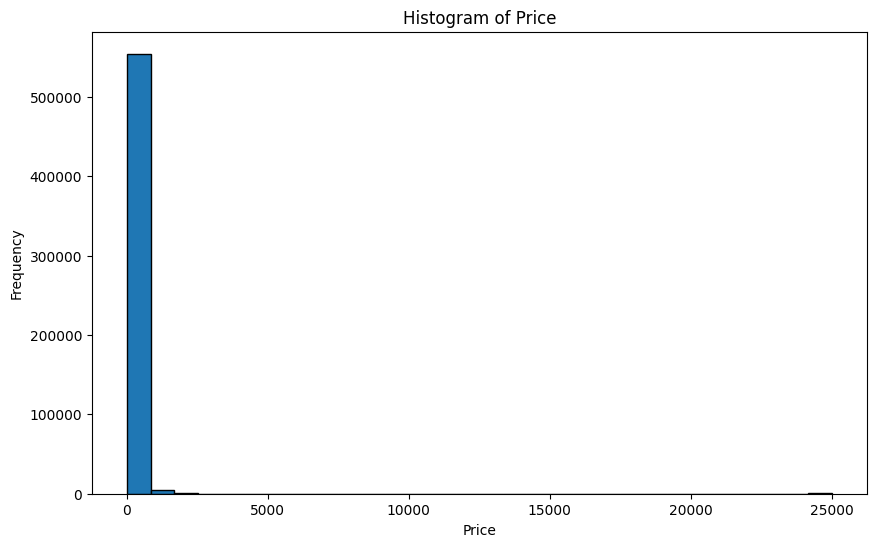

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(cal_listings_df_sample['price'].dropna(), bins=30, edgecolor='black')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Histogram of Price with x-axis limited at 1,000

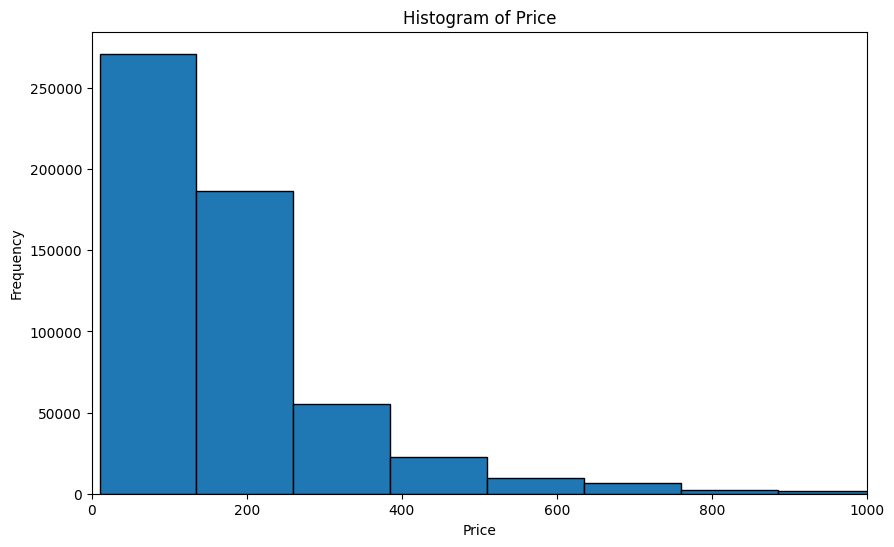

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(cal_listings_df_sample['price'].dropna(), bins=200, edgecolor='black')
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.show()

- Most of our data falls below $400.

## Visualizing Beds vs. Price

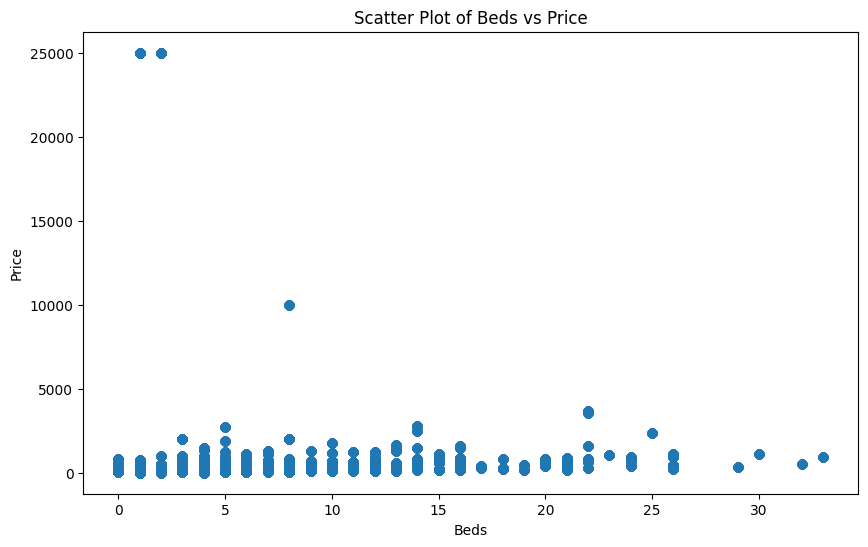

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(cal_listings_df_sample['beds'], cal_listings_df_sample['price'], alpha=0.5)
plt.title('Scatter Plot of Beds vs Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

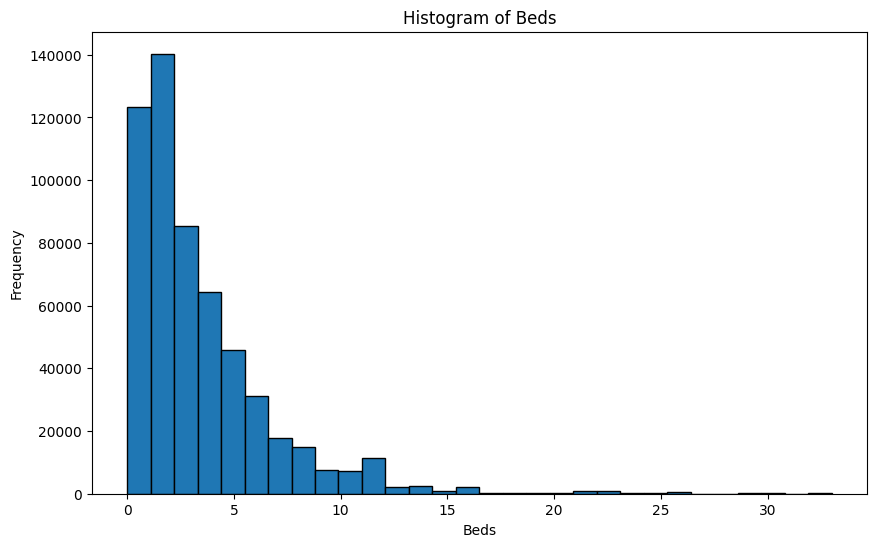

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(cal_listings_df_sample['beds'].dropna(), bins=30, edgecolor='black')
plt.title("Histogram of Beds")
plt.xlabel("Beds")
plt.ylabel("Frequency")
plt.show()

- There does not seem to be a relation between bed # and price. However, this does show that some outliers exist for price.

### Summarizing Average Price Per Night in Nashville Neighborhoods

In [19]:
grouped = cal_listings_df_sample.groupby('neighbourhood')
grouped = grouped['price'].mean()
avg_neigh_price = pd.DataFrame(grouped)
avg_neigh_price = avg_neigh_price.reset_index()
avg_neigh_price

,neighbourhood,price
0,"Antioch, Tennessee, United States",81.083102
1,"Berry Hill, Tennessee, United States",164.211679
2,"Brentwood, Tennessee, United States",93.419414
3,"Goodlettsville, Tennessee, United States",124.035533
4,"Greenbrier, Tennessee, United States",99.000000
5,"Hermitage , Tennessee, United States",65.000000
6,"Madison , Tennessee, United States",72.000000
7,"Madison, Tennessee, United States",112.333333
8,"Nashville\nHermitage, Tennessee, United States",25.000000
9,"Nashville , Tennessee, United States",120.415094


### Visualizing Average Price Per Night in Nashville Neighborhoods

In [20]:
cal_listings_df_sample['neighbourhood'].value_counts()

neighbourhood
Nashville, Tennessee, United States               445266
Goodlettsville, Tennessee, United States            1970
Berry Hill, Tennessee, United States                 548
Brentwood, Tennessee, United States                  546
Antioch, Tennessee, United States                    361
Madison, Tennessee, United States                    309
Nashville , Tennessee, United States                 212
Pegram, Tennessee, United States                     206
Nashville, United States                             116
Hermitage , Tennessee, United States                 115
Greenbrier, Tennessee, United States                 115
Whites Creek,TN , Tennessee, United States           113
Old Hickory, Tennessee, United States                111
Madison , Tennessee, United States                   109
Nashville , Tn, United States                        108
United States                                        103
Nashville\nHermitage, Tennessee, United States        99
Name: count, dtyp

In [21]:
neighborhood = avg_neigh_price['neighbourhood']
price = avg_neigh_price['price']

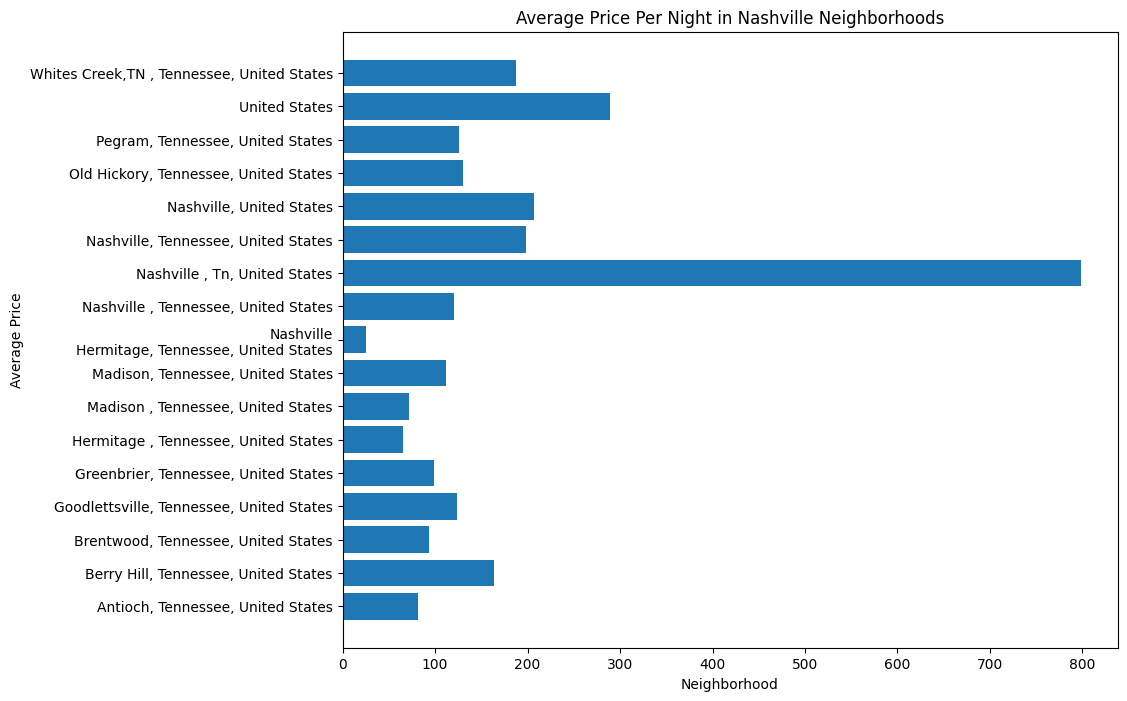

In [22]:
plt.figure(figsize=(10, 8))
plt.barh(neighborhood, price)
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.title("Average Price Per Night in Nashville Neighborhoods")
plt.show()

- There is some variance in the avergage price of airbnb listings between neighborhoods. The obvious outlier is 'Nashville, Tn, United States'. There are multiple other Nashvilles listed, and it is unclear whether they are denoting different areas from one another.

### Visualizing average price vs. Host Neighbourhoods

In [23]:
grouped_hn = cal_listings_df_sample.groupby('host_neighbourhood')
grouped_hn = grouped_hn['price'].mean()
avg_hn_price = pd.DataFrame(grouped_hn)
avg_hn_price = avg_hn_price.reset_index()
avg_hn_price = avg_hn_price.sort_values(by='price', ascending=False)
avg_hn_price

,host_neighbourhood,price
85,Lower East Side,662.000000
159,Woodland in Waverly,629.000000
1,Acklen Westgrove,500.000000
106,Northwest Nashville,499.000000
123,Saint-Germain-des-Prés - Odéon,450.000000
...,...,...
5,Beacon Square,45.621083
88,Marrowbone,45.000000
8,Bellshire Terrace,40.000000
132,South Miami Heights,31.775641


In [24]:
x = avg_hn_price['host_neighbourhood']
y = avg_hn_price['price']

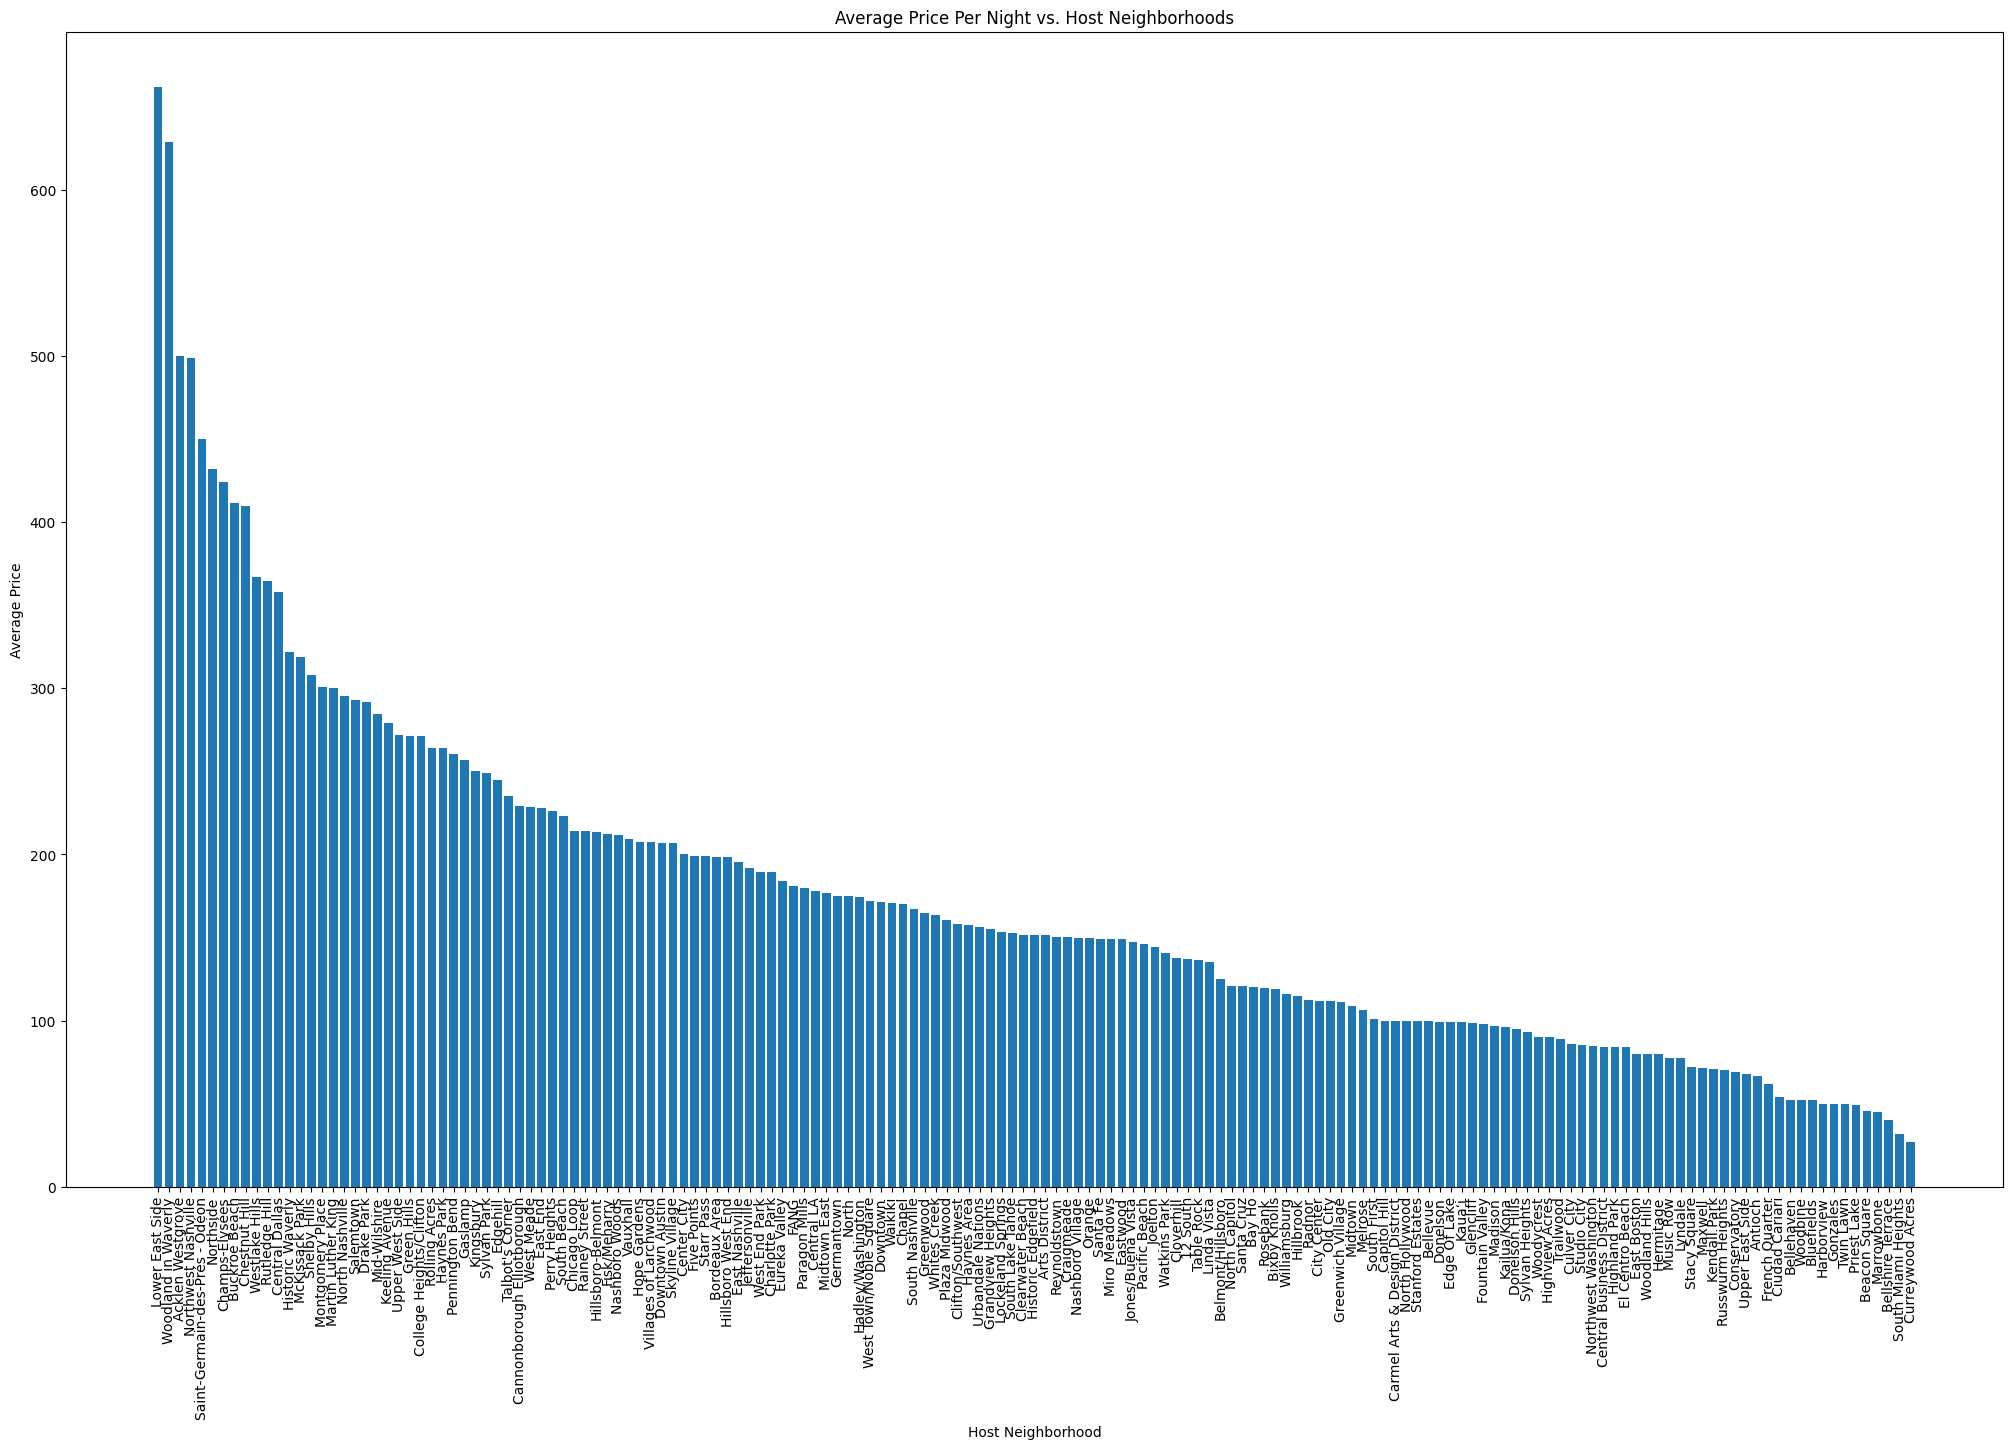

In [25]:
plt.figure(figsize=(25, 15))
plt.bar(x, y)
plt.xlabel("Host Neighborhood")
plt.ylabel("Average Price")
plt.title("Average Price Per Night vs. Host Neighborhoods")
plt.xticks(x, x, rotation=90)
plt.show()

### Getting value counts for host neighborhoods

In [26]:
hn_vc = cal_listings_df_sample['host_neighbourhood'].value_counts()
with pd.option_context('display.max_rows', None):
    print(hn_vc)

host_neighbourhood
Downtown                          31311
Edgehill                          29315
North Nashville                   23898
East Nashville                    14509
Talbot's Corner                   12340
Midtown                           11044
12 South                          10276
South Nashville                    7876
Arts District                      6059
North Capitol                      5956
McKissack Park                     5756
Watkins Park                       4671
Chestnut Hill                      4442
Historic Edgefield                 4091
Music Row                          3903
Urbandale Nations                  3432
Fisk/Meharry                       3212
Old City                           3079
Table Rock                         2788
Green Hills                        2512
Hillsboro-Belmont                  2365
Melrose                            2262
Hope Gardens                       2030
West End Park                      1729
Villages of Larchwood

### Bar Graph of Listing Availibility

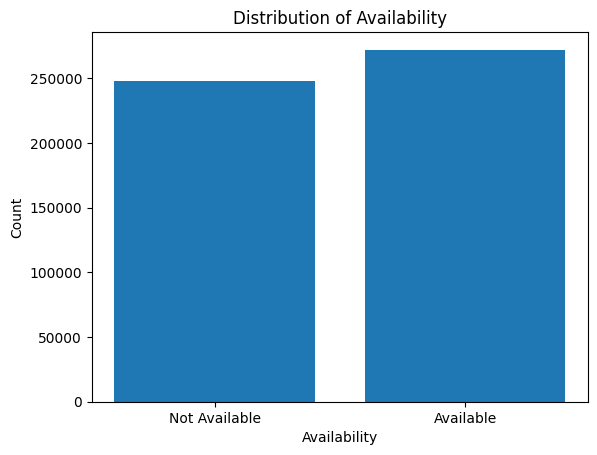

In [166]:
data = cal_listings_df_sample['cal_available']

bool_data = [int(value) for value in data]

unique, counts = np.unique(bool_data, return_counts=True)

plt.bar(unique, counts, tick_label=["Not Available", "Available"])

plt.xlabel("Availability")
plt.ylabel("Count")
plt.title("Distribution of Availability")
plt.show()

### Frequency of Availability

In [176]:
frequency_count = cal_listings_df_sample['cal_available'].value_counts()
print(frequency_count)

cal_available
1    272008
0    247626
Name: count, dtype: int64


### Proportion of Availability

In [177]:
proportions =  cal_listings_df_sample['cal_available'].value_counts(normalize=True)
print(proportions)

cal_available
1    0.523461
0    0.476539
Name: proportion, dtype: float64


### Distribution of Availability by Neighborhood

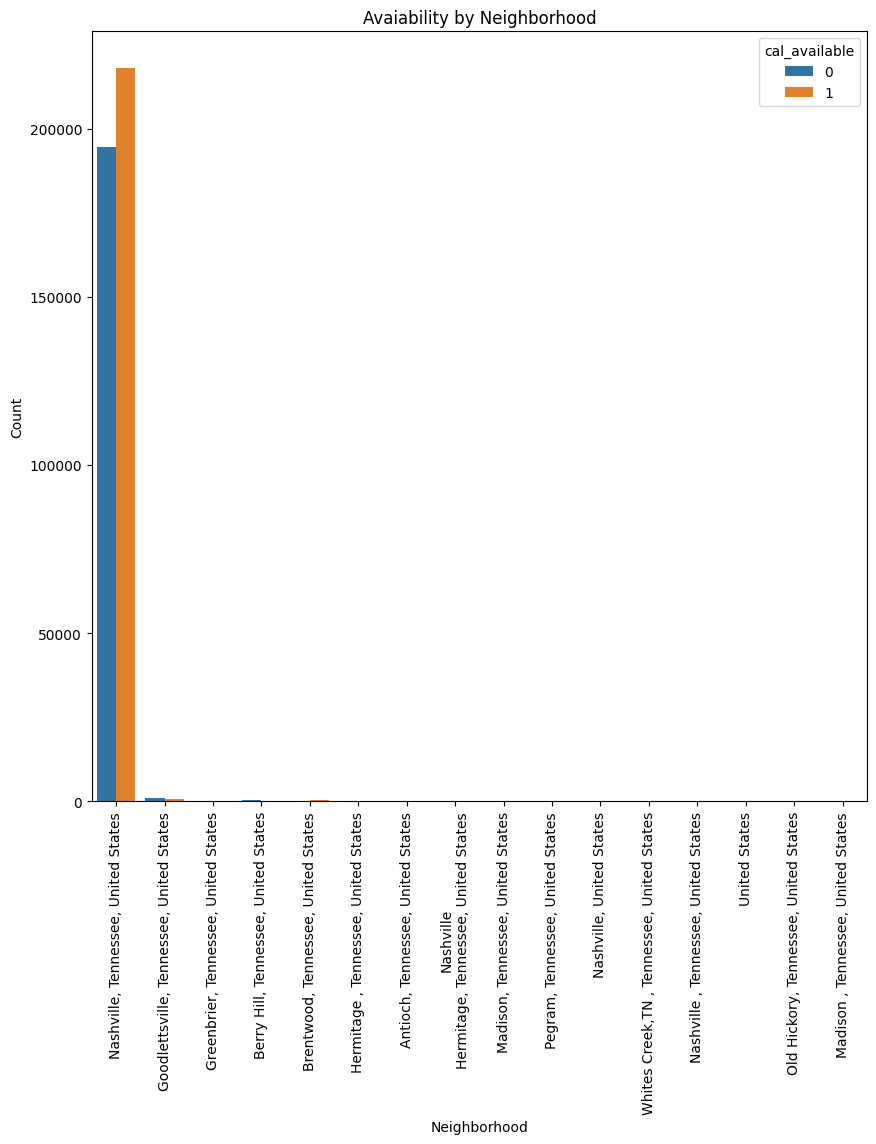

In [174]:
plt.figure(figsize=(10, 10))
sns.countplot(x='neighbourhood', hue='cal_available', data=cal_listings_df_sample)

plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Avaiability by Neighborhood')
plt.xticks(rotation=90)
plt.show()

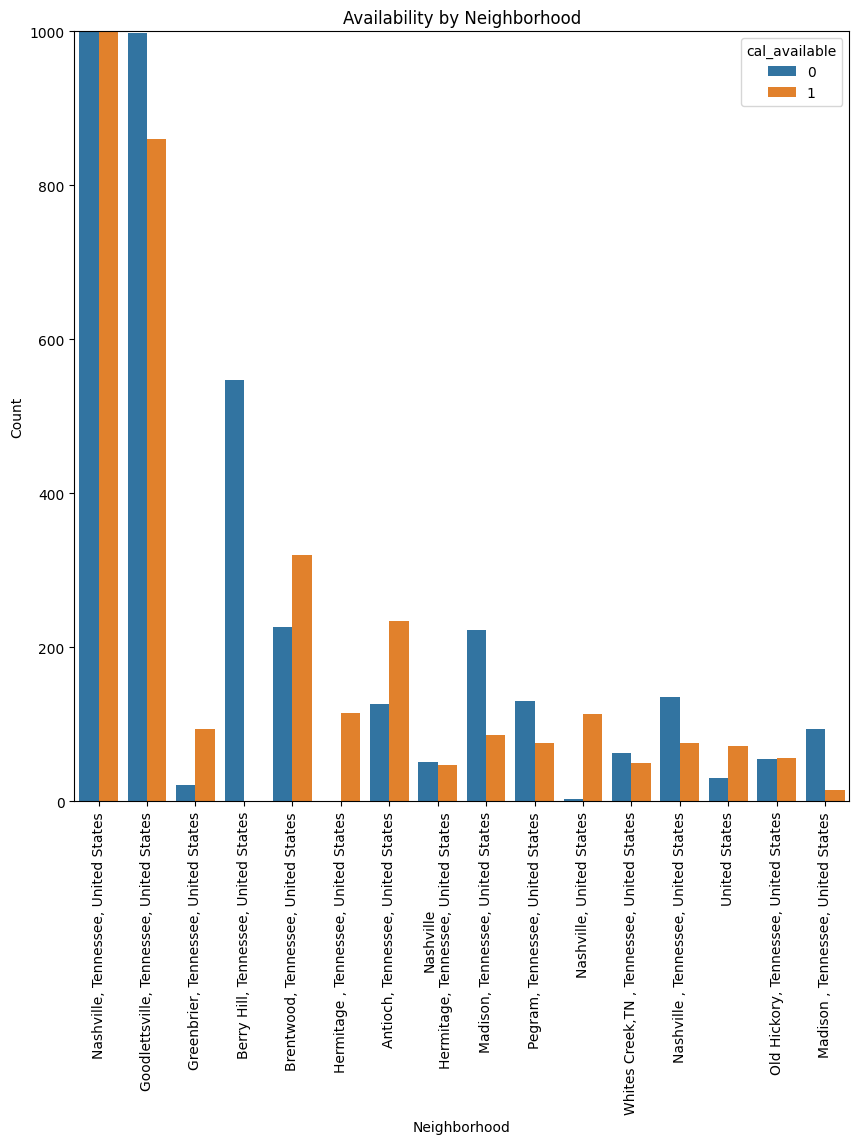

In [175]:
plt.figure(figsize=(10, 10))
sns.countplot(x='neighbourhood', hue='cal_available', data=cal_listings_df_sample)

plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Availability by Neighborhood')
plt.xticks(rotation=90)
plt.ylim(0, 1000)
plt.show()

## Initial Feature Variable Selection

In [27]:
categorical_cols = cal_listings_df_sample.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['name', 'description', 'host_name', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'property_type', 'room_type']


In [28]:
print(cal_listings_df_sample['room_type'].value_counts())

room_type
Entire home/apt    494097
Private room        58728
Hotel room           6643
Shared room          1447
Name: count, dtype: int64


### Converting property type & room type to dummy variables

In [29]:
property_dummies = pd.get_dummies(cal_listings_df_sample['property_type'], drop_first=False, prefix='pt')
room_type = pd.get_dummies(cal_listings_df_sample['room_type'], drop_first=False ,prefix ='rt')
host_neighborhood = pd.get_dummies(cal_listings_df_sample['host_neighbourhood'], drop_first=False, prefix='hn')

cal_listings_df_sample = pd.concat([cal_listings_df_sample, property_dummies, room_type, host_neighborhood], axis=1)
cal_listings_df_sample.drop(['property_type', 'room_type'], axis=1, inplace=True)

### Dropping target variable, variables that can't be coverted to dummy variables, or variables that would not make sense as a predictor.

In [30]:
cal_list_new_df = cal_listings_df_sample.drop(columns= ['price', 'cal_price', 'listing_id', 'name', 'description', 'host_name', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'longitude', 'latitude'], axis=1)

In [31]:
cal_list_new_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 560915 entries, 1006826 to 92975
Data columns (total 421 columns):
 #    Column                                        Non-Null Count   Dtype  
---   ------                                        --------------   -----  
 0    host_id                                       560915 non-null  int64  
 1    host_since                                    560915 non-null  float64
 2    host_is_superhost                             560915 non-null  int64  
 3    host_listings_count                           560915 non-null  float64
 4    host_total_listings_count                     560915 non-null  float64
 5    host_has_profile_pic                          560915 non-null  int64  
 6    host_identity_verified                        560915 non-null  int64  
 7    accommodates                                  560915 non-null  int64  
 8    bathrooms                                     560915 non-null  float64
 9    bedrooms                           

## Creating Our Regression Model(s) and its Relevancy to Inside Airbnb

- Inside Airbnb advocates against the dissatisfaction and displacement of residents caused by the impacts of short-term rental companies like Airbnb. One of the ways residents are displaced is by the raising of rents caused by the high demand of short term rentals in the local area. The high demand causes the rasing of rental prices for short and long-term rentals alike. 
- So, if we could predict the price of Airbnb listings based on the features given to us, we could infer as to the affect of these prices on long-term rentals in the surrounding area. 
- Inside Airbnb could use these predictions in order to add a 'Demand Effect' section to their dashboard, which would predict rent hikes in long-term rentals based on if our short-term rental predictions are showing price increases. Areas with a high amount of predicted short-term rental price increases could be shown to be 'At Risk' for long-term rental price increases.

## Starting with a Lasso Regression in order to determine feature importance

#### Removing Outliers from Price

In [32]:
Q1 = cal_listings_df_sample['price'].quantile(0.25)
Q3 = cal_listings_df_sample['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cal_listings_df_sample = cal_listings_df_sample[(cal_listings_df_sample['price'] >= lower_bound) & (cal_listings_df_sample['price'] <= upper_bound)]

In [33]:
X = cal_listings_df_sample.drop(columns= ['price', 'cal_price', 'listing_id', 'name', 'description', 'host_name', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'longitude', 'latitude'], axis=1)
y = cal_listings_df_sample['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


sc = preprocessing.StandardScaler()

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [34]:
lasso_sc = Lasso(alpha=1, fit_intercept=True, max_iter = 100)
lasso_sc.fit(X_train_sc, y_train)

Lasso(alpha=1, max_iter=100)

In [35]:
lasso_pred = lasso_sc.predict(X_test_sc)

In [36]:
lasso_pred

array([111.60253394,  66.63514018,  73.56010285, ..., 160.899163  ,
       134.4846183 , 213.70543709])

## Lasso Score

In [37]:
lasso_sc.score(X_test_sc, y_test)

0.6384033375434852

## Comparing MSE to the variance of our target variable

In [38]:
mse = mean_squared_error(y_test, lasso_pred)
mse

2554.514529116003

In [39]:
cal_listings_df_sample['price'].var()

7065.110517651424

### Getting Top Lasso Variables Based on Coefficients

In [40]:
lasso_sc.coef_

array([ 0.00000000e+00, -0.00000000e+00,  2.68922302e+00, -1.99594525e+00,
       -1.40020882e-15, -0.00000000e+00, -9.37493895e-02,  2.19775112e+01,
        1.91207620e+01,  1.57154477e+01,  0.00000000e+00, -7.66505362e+00,
       -0.00000000e+00,  2.55738105e-01,  3.87332302e+00,  0.00000000e+00,
        0.00000000e+00,  6.72766500e-02, -0.00000000e+00, -2.62221330e+00,
       -3.98419080e+00,  0.00000000e+00,  6.01120463e+00,  4.75166621e+00,
        0.00000000e+00,  8.35002683e-01,  0.00000000e+00, -1.99899350e+00,
        1.71979557e+00, -0.00000000e+00,  0.00000000e+00, -5.10775956e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -7.97503279e+00,
        4.02945115e-01, -1.51333015e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.36218254e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.56322752e+00,  0.00000000e+00,
       -1.24812398e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [41]:
df_lasso = pd.DataFrame(lasso_sc.coef_)

In [42]:
names = pd.DataFrame(list(X.columns))
df_lasso = pd.concat([names, df_lasso], axis = 1)
df_lasso.head()

,0,0
0,host_id,0.000000e+00
1,host_since,-0.000000e+00
2,host_is_superhost,2.689223e+00
3,host_listings_count,-1.995945e+00
4,host_total_listings_count,-1.400209e-15


## Top 25 Lasso Variables

In [43]:
df_lasso.columns = ['Feature', 'lasso_coeff_1']
df_lasso = df_lasso.sort_values(by='lasso_coeff_1', ascending = False)
df_lasso.head(25)

,Feature,lasso_coeff_1
7,accommodates,21.977511
8,bathrooms,19.120762
9,bedrooms,15.715448
154,dist_19,10.978551
246,pt_Room in boutique hotel,6.650142
22,last_review,6.011205
284,hn_Chestnut Hill,4.972464
23,review_scores_rating,4.751666
248,pt_Room in hotel,4.157777
14,availability_30,3.873323


### Removing all variables with a lasso coefficient of 0

In [44]:
newfeat_df = df_lasso[df_lasso['lasso_coeff_1']!=0]
newfeat_df

,Feature,lasso_coeff_1
7,accommodates,21.977511
8,bathrooms,19.120762
9,bedrooms,15.715448
154,dist_19,10.978551
246,pt_Room in boutique hotel,6.650142
...,...,...
364,hn_North Nashville,-5.513316
182,response_within_hour,-6.221652
11,minimum_nights,-7.665054
35,reviews_per_month,-7.975033


### Creating dataframe with the non-zero coefficients

In [45]:
new_col = newfeat_df['Feature'].to_list()

In [46]:
newfeat_df = cal_listings_df_sample[new_col]
newfeat_df.head()

,accommodates,bathrooms,bedrooms,dist_19,pt_Room in boutique hotel,last_review,hn_Chestnut Hill,review_scores_rating,pt_Room in hotel,availability_30,am_Elevator,dist_6,am_Indoorfireplace,am_Dishwasher,host_is_superhost,pt_Entire serviced apartment,am_Carbonmonoxidealarm,dist_17,dist_18,am_Room-darkeningshades,room_Hotel room,pt_Entire villa,dist_21,am_Firstaidkit,review_scores_location,hn_Hillsboro-Belmont,hn_Green Hills,pt_Entire house,am_Hottub,am_Freestreetparking,pt_Private room in resort,am_BBQgrill,hv_work_email,dist_24,am_CableTV,hn_Westlake Hills,am_Keypad,pt_Entire loft,review_scores_cleanliness,pt_Private room in nature lodge,dist_25,hv_google,hv_manual_online,hn_East Nashville,am_Paidparkingoffpremises,am_Breakfast,hn_Salemtown,hn_Champs-Elysées,response_few_days,pt_Entire cabin,hn_Martin Luther King,am_Wifi,hn_Lockeland Springs,am_Patioorbalcony,am_Fullkitchen,am_Cleaningproducts,hn_McKissack Park,hn_Gaslamp,hn_Joelton,hn_Kingsbury,hn_West Meade,has_availability,am_Fireextinguisher,hn_Sylvan Heights,am_Gameconsole,hn_Rainey Street,hn_Sylvan Park,cal_available,hn_Curreywood Acres,hn_Five Points,pt_Entire guesthouse,am_Paidparkingonpremises,availability_365,host_total_listings_count,rt_Shared room,rt_Private room,dist_31,hn_Antioch,hn_Kauaʻi,hn_Historic Edgefield,dist_32,hn_Montgomery Place,hn_Culver City,hn_Conservatory,host_identity_verified,am_Oven,hn_Fisk/Meharry,hn_Stacy Square,am_Gym,dist_7,hv_manual_offline,hn_Glencliff,hn_Bellevue,dist_9,hn_Talbot's Corner,hn_Downtown,hn_Midtown,hn_Beacon Square,hv_identity_manual,room_Shared room,dist_14,pt_Shared room in house,dist_10,hn_Bellshire Terrace,dist_13,hn_Upper East Side,pt_Private room in townhouse,dist_28,hv_reviews,dist_29,hn_Urbandale Nations,hn_Central Business District,hn_Cloverhill,am_Refrigerator,am_Ethernetconnection,am_Keurigcoffeemachine,am_Showergel,am_Bakingsheet,hn_Music Row,am_Privateentrance,hn_Northwest Washington,hn_FANG,pt_Entire guest suite,dist_16,hn_Capitol Hill,am_Freeparkingonpremises,dist_4,am_Bedlinens,am_Essentials,am_Singlelevelhome,am_Smokealarm,hn_South Beach,hn_North Capitol,am_Longtermstaysallowed,hn_Vauxhall,dist_8,hn_12 South,dist_12,hn_Kailua/Kona,host_listings_count,review_scores_communication,pt_Shared room in hostel,dist_15,pt_Campsite,pt_Room in hostel,hn_Pacific Beach,number_of_reviews_ltm,pt_Private room in house,pt_Private room in apartment,hn_Old City,number_of_reviews_l30d,calculated_host_listings_count,hn_North Nashville,response_within_hour,minimum_nights,reviews_per_month,room_Private room
1006826,8,2.0,3.0,1,False,156.0,False,99.0,False,17,0,0,0,1,1,False,1,0,0,0,0,False,0,0,10.0,False,False,False,0,1,False,0,0,0,1,False,1,False,10.0,False,0,0,0,False,0,0,False,False,0,False,False,1,False,1,0,0,False,False,False,False,False,1,1,False,0,False,False,1,False,False,False,0,97,4.0,False,False,0,False,False,False,0,False,False,False,0,1,False,False,0,0,0,False,False,0,False,False,False,False,0,0,0,False,0,False,0,False,False,0,1,0,False,False,False,1,0,1,0,1,False,1,False,False,False,0,False,1,0,1,1,1,1,False,False,0,False,0,False,0,False,4.0,10.0,False,0,False,False,False,23,False,False,False,0,3,False,0,3,2.95,0
540280,4,1.0,2.0,0,False,451.0,False,99.0,False,0,0,1,0,1,1,False,1,0,0,0,0,False,0,1,10.0,False,False,True,0,0,False,0,0,0,0,False,0,False,10.0,False,0,0,0,False,0,0,False,False,0,False,False,1,False,0,0,0,False,False,False,False,False,1,1,False,0,False,False,0,False,False,False,0,0,3.0,False,False,0,False,False,False,0,False,False,False,1,1,False,False,0,0,0,False,False,0,False,False,False,False,0,0,0,False,0,False,0,False,False,0,1,0,False,False,False,1,0,0,0,0,False,1,False,False,False,0,False,1,0,1,1,1,1,False,False,1,False,0,False,0,False,3.0,10.0,False,0,False,False,False,2,False,False,False,0,2,False,0,1,4.01,0
1563087,10,3.5,3.0,0,False,314.0,False,95.0,False,0,0,0,0,1,1,False,1,0,0,0,0,False,0,1,10.0,False,False,True,0,0,False,0,0,0,1,False,1,False,10.0,False,0,1,0,False,0,0,False,False,0,False,False,

### Creating loop to identify optimal alpha value for Lasso Regression

plt.figure(figsize=(20,10))

alphas = [0.1, 0.5, 1, 5, 7, 10, 15,20, 25, 50]
scores = []

for a in alphas:
    #lasso = Lasso(alpha = a, fit_intercept=True, normalize = True)
    lasso = Lasso(alpha = a, fit_intercept=True)
    
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

### Running Model with Optimal Alpha Value

In [47]:
lasso = Lasso(alpha=.1, fit_intercept=True, max_iter=3000)

lasso.fit(X_train_sc, y_train)
lasso_pred = lasso.predict(X_test_sc)

print ('Lasso R Sq. Score ---------')
print ('')
print (lasso.score(X_test_sc, y_test))
print('')
print ('---------------------------')

df_lasso_1 = pd.DataFrame(lasso.coef_)
names = pd.DataFrame(list(X.columns))
df_lasso_1 = pd.concat([names, df_lasso_1], axis = 1)
df_lasso_1.columns = ['Feature', 'lasso_coeff_1']
df_lasso_1 = df_lasso_1.sort_values(by='lasso_coeff_1', ascending = False)
df_lasso_1.head()

Lasso R Sq. Score ---------

0.6707996849946413

---------------------------


,Feature,lasso_coeff_1
7,accommodates,22.233256
8,bathrooms,20.396330
9,bedrooms,16.431908
154,dist_19,15.183887
246,pt_Room in boutique hotel,8.063543


## Creating Ridge Regression to generate price predictions

In [48]:
X = cal_listings_df_sample.drop(columns= ['price', 'cal_price', 'listing_id', 'name', 'description', 'host_name', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'longitude', 'latitude'], axis=1)
y = cal_listings_df_sample['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


sc = preprocessing.StandardScaler()

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [49]:
ridge = Ridge(alpha=.1, fit_intercept=True,  max_iter=3000)

In [50]:
ridge.fit(X_train_sc, y_train)

Ridge(alpha=0.1, max_iter=3000)

## Ridge Score and MSE

In [51]:
ridge.score(X_test_sc, y_test)

0.6720251786840513

In [52]:
ridge_pred = ridge.predict(X_test_sc)
ridge_pred

array([107.98171254,  55.78976821,  78.6297397 , ..., 162.5335856 ,
       123.32234441, 204.82070486])

In [53]:
mse = mean_squared_error(y_test, ridge_pred)
mse

2316.9916462837114

### Tuning Parameters for Ridge Regression

iteration 0.1 done
iteration 0.5 done
iteration 1 done
iteration 5 done
iteration 10 done
iteration 25 done
iteration 50 done
iteration 100 done
iteration 150 done
iteration 200 done


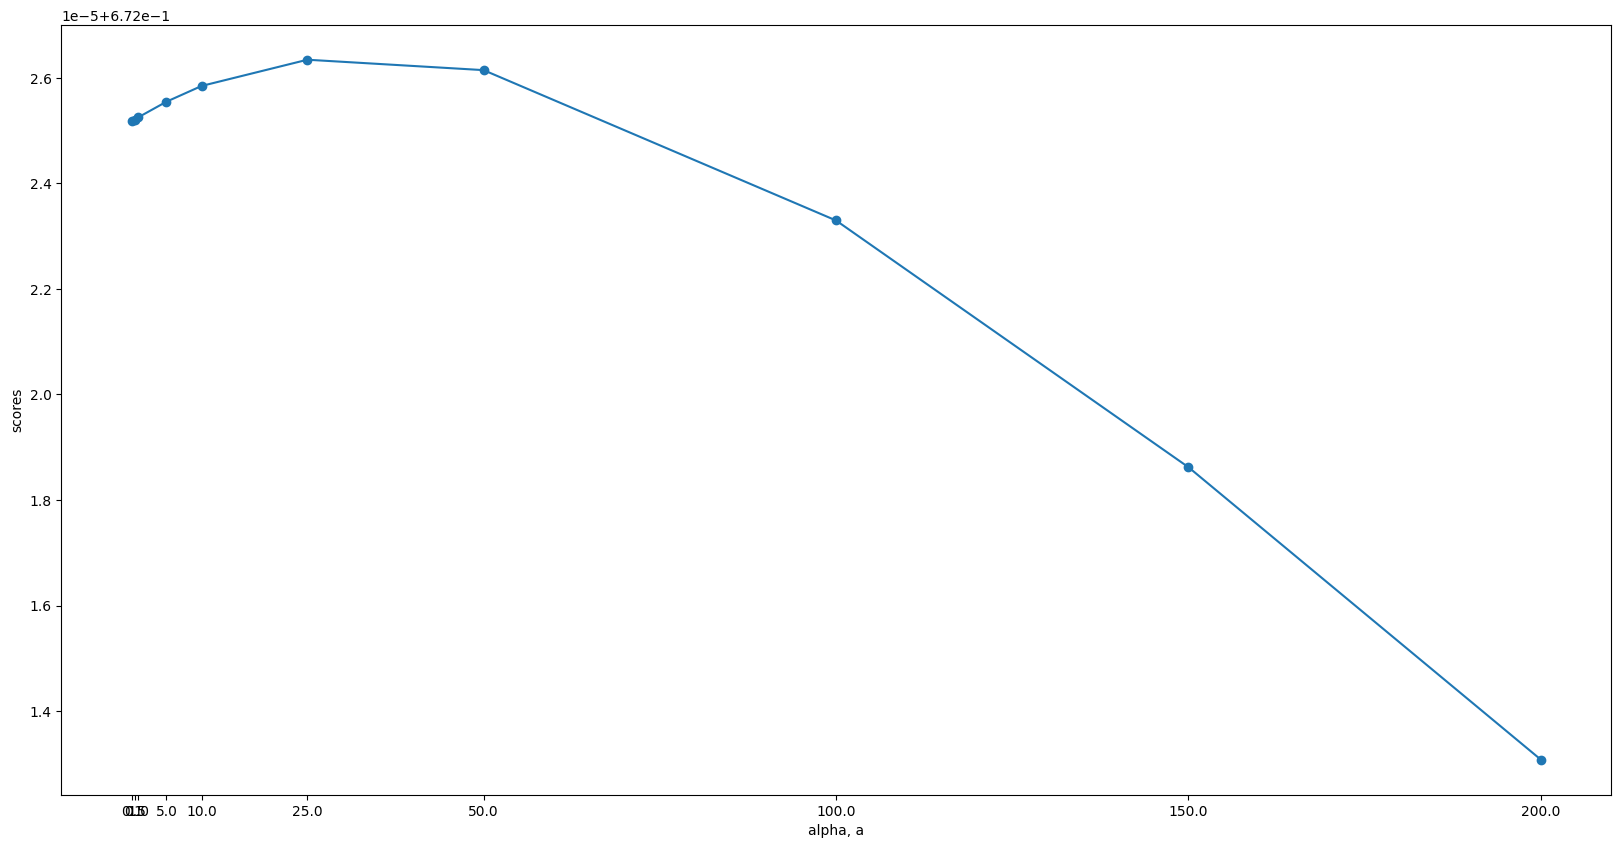

In [54]:
plt.figure(figsize=(20,10))

alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100, 150, 200]
scores = []

for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept=True)
    ridge.fit(X_train_sc, y_train)
    scores.append(ridge.score(X_test_sc, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

### Final Ridge Regression Model with New Alpha

In [55]:
ridge = Ridge(alpha=25, fit_intercept=True,  max_iter=3000)

In [56]:
ridge.fit(X_train_sc, y_train)

Ridge(alpha=25, max_iter=3000)

In [57]:
ridge.score(X_test_sc, y_test)

0.6720263453361078

In [58]:
ridge_pred = ridge.predict(X_test_sc)
ridge_pred

array([107.99768307,  55.73884668,  78.64727741, ..., 162.56084618,
       123.33956353, 204.7896997 ])

In [59]:
mse = mean_squared_error(y_test, ridge_pred)
mse

2316.9834044221616

### Creating DataFrame with with Price and Predicted Price

In [60]:
df_ridge_pred = pd.DataFrame(ridge_pred, columns = ['ridge_pred'])
display(df_ridge_pred.head())
df_ridge_pred.shape

,ridge_pred
0,107.997683
1,55.738847
2,78.647277
3,110.690429
4,152.407679


(103927, 1)

In [61]:
df_target = pd.DataFrame(y_test).reset_index()
display(df_target.head())
df_target.shape

,index,price
0,534911,86.0
1,1600481,64.0
2,785633,55.0
3,325254,101.0
4,529241,199.0


(103927, 2)

In [62]:
df_results = pd.concat([df_target, df_ridge_pred], axis=1)
df_results['ridge_resid'] = df_results['price'] - df_results['ridge_pred']
df_results.head(20)

,index,price,ridge_pred,ridge_resid
0,534911,86.0,107.997683,-21.997683
1,1600481,64.0,55.738847,8.261153
2,785633,55.0,78.647277,-23.647277
3,325254,101.0,110.690429,-9.690429
4,529241,199.0,152.407679,46.592321
5,174874,77.0,80.032006,-3.032006
6,510366,160.0,156.033927,3.966073
7,276170,191.0,235.201580,-44.201580
8,1455697,89.0,114.880499,-25.880499
9,1811745,131.0,167.641293,-36.641293


## Summary of Regression Results and Comments
- Our final ridge regression model produced an R-squared value of .672 and a mean squared error of 2316.98.
- While our R-squared value could use improvement, our MSE value indicates that our model is doing well. The MSE value of 2316.98 is much lower than the variance value of the target variable, 7065.11, indicating the models predictions are much closer to predicting the true values rather than just the mean of the target variable.
- I was not able to perform cross-validation, grid search, or forward selection due to them taking an extraordinarily long amount of time.

## Creating Our Regression Model(s) and its Relevancy to Inside Airbnb

- Listing availability, just like changes in price, can be a key indicator of demand for short-term rentals.  If availability can be predicted, Inside Airbnb can use the predictions to help determine which areas are in high demand, and thus, which areas are at risk for displacement of its residents.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

### Removing 'availability_#' variables to avoid overfitting

In [64]:
X = cal_listings_df_sample.drop(columns= ['cal_available','listing_id', 'name', 'description', 'host_name', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'availability_30','availability_60','availability_90','availability_365'], axis=1)
y = cal_listings_df_sample['cal_available']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating functions for long and short Random Forest results

In [66]:
def modeltraintest(vartrain, vartest, y_train, y_test, model):

    #1) Set the properties for the model (model) - by setting vartrain, vartest, and model
    
    #2) Fit the model with training data
    model.fit(vartrain, y_train)

    #3) Predict the target variable with test data
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)

    #4) Assess the accuracy with the test data
    score = model.score(vartest, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")


    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")


    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')


    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Classification Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')


    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)

    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [72]:
# Creating a defined function for a short verion of the modeling results

def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)


    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model_pred))
    print("")

    #Assess with the model
    score = model.score(vartest, y_test)
    score_format = 'Accuracy Score: {0:.4f}'.format(score)
    print(score_format)

    recall = recall_score(y_test, model_pred)
    recall_format = 'Recall Score: {0:.4f}'.format(recall)
    print(recall_format)
    
    precision = precision_score(y_test, model_pred)
    precision_format = 'Precision Score: {0:.4f}'.format(precision)
    print(precision_format)
    
    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)

### Creating Dataframe of Important Feature Variables

In [68]:
feature_importances = model.feature_importances_
top_features = [feature for feature, importance in zip(X_train.columns, feature_importances) if importance > 0.01] 
X_train_reduced = X_train[top_features]
X_train_reduced

,host_id,host_since,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,price,number_of_reviews,number_of_reviews_ltm,first_review,last_review,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,response_within_hour,cal_price,cal_minimum_nights,weekday_Friday,weekday_Saturday,weekday_Sunday,weekday_Thursday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2021,year_2022
501897,109904033,1618.0,299.0,299.0,36.21966,-86.70542,6,2.0,180.0,3,1,1344.0,317.0,5,4,0.07,0,169.0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1360886,57338877,1954.0,4.0,4.0,36.19608,-86.59446,6,1.0,19.0,1,1,464.0,464.0,3,3,0.08,0,19.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
206485,18056757,2524.0,1.0,1.0,36.13053,-86.77590,2,2.0,100.0,142,2,1920.0,458.0,1,0,2.35,1,100.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1809188,375644856,208.0,13.0,13.0,36.19457,-86.77561,10,5.0,205.0,5,5,171.0,130.0,3,3,2.42,1,394.0,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1151766,53517885,1982.0,8.0,8.0,36.16964,-86.80196,3,2.0,28.0,161,68,722.0,130.0,8,2,7.88,1,35.0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659659,924680,3597.0,0.0,0.0,36.16790,-86.75045,8,5.0,342.0,7,7,299.0,235.0,1,1,1.11,1,480.0,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
732201,197144624,1085.0,1.0,1.0,36.12756,-86.77783,4,2.0,66.0,122,33,1082.0,159.0,1,1,3.76,1,80.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1572186,194953121,1095.0,2712.0,2712.0,36.22002,-86.70433,8,4.0,89.0,3,3,279.0,222.0,54,54,0.53,1,540.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
593046,8973736,2819.0,6.0,6.0,36.17708,-86.74870,6,3.0,292.0,67,3,1207.0,208.0,4,4,1.83,1,229.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


### Tweaking Model Parameters

iteration 1 done. Accuracy = 0.8158803775727194
iteration 20 done. Accuracy = 0.8987847238927325
iteration 50 done. Accuracy = 0.9008053730022034
iteration 100 done. Accuracy = 0.9017194761707737
iteration 150 done. Accuracy = 0.9022198273788332
iteration 500 done. Accuracy = 0.9039710566070415


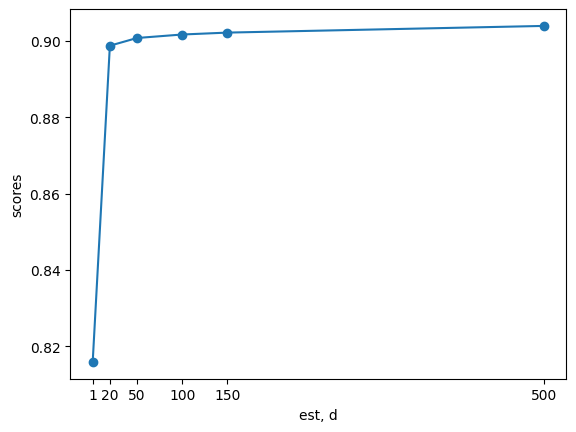

In [69]:
# Creating function to determine optimal # of features

figsize=(20, 5)
est = [1, 20, 50, 100, 150, 500]
scores = []

for d in est:
    classifier=RandomForestClassifier(max_depth = 22, max_features = 12, n_estimators = d, random_state=21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))


plt.plot(est, scores, '-o')
plt.xlabel('est, d')
plt.ylabel('scores')
plt.xticks(est)
plt.show()

#### features = 500 produced the highest accuracy score, but took extremely long to run. 20 produced similar results and ran much faster, so we will use that for the model

In [73]:
# Using loop to determine optimal class weight

cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, 
      {0:1, 1:20}, {0:1, 1:25}, {0:1, 1:30}, {0:1, 1:50}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = RandomForestClassifier(max_depth = 9, max_features = 100, n_estimators = 150, class_weight=varcw)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

Confusion Matrix:
[[36764 12862]
 [ 9441 44860]]

Accuracy Score: 0.7854
Recall Score: 0.8261
Precision Score: 0.7772
ROC AUC Score: 0.8638
----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[39624 10002]
 [12422 41879]]

Accuracy Score: 0.7842
Recall Score: 0.7712
Precision Score: 0.8072
ROC AUC Score: 0.8652
----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[19785 29841]
 [ 1692 52609]]

Accuracy Score: 0.6966
Recall Score: 0.9688
Precision Score: 0.6381
ROC AUC Score: 0.8591
----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[14647 34979]
 [  606 53695]]

Accuracy Score: 0.6576
Recall Score: 0.9888
Precision Score: 0.6055
ROC AUC Score: 0.8538
----------------------
Model with Class Weight: {0: 1, 1: 5}

Confusion Matrix:
[[10245 39381]
 [   43 54258]]

Accuracy Score: 0.6207
Recall Score: 0.9992
Precision Score: 0.5794
ROC AUC Score: 0.8473
--

#### A class weight of none produced the best tradeoff between accuracy, recall, and precision.

In [75]:
# Testing n_estimators =  20

vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth = 22, max_features = 12, n_estimators = 20, random_state=21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[43596  6030]
 [ 4489 49812]]

Accuracy Score: 0.8988
Recall Score: 0.9173
Precision Score: 0.8920
ROC AUC Score: 0.9574


In [76]:
# Testing n_estimators = 150

vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth = 22, max_features = 12, n_estimators = 150, random_state=21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[43647  5979]
 [ 4183 50118]]

Accuracy Score: 0.9022
Recall Score: 0.9230
Precision Score: 0.8934
ROC AUC Score: 0.9601


In [77]:
# Testing n_estimators = 500

vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth = 22, max_features = 12, n_estimators = 500, random_state=21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[43660  5966]
 [ 4014 50287]]

Accuracy Score: 0.9040
Recall Score: 0.9261
Precision Score: 0.8939
ROC AUC Score: 0.9608


#### n_estimators = 500 produced the highest accuracy score, but took extremely long to run. 20 produced similar results and ran much faster, so we will use that for the model

### Testing Model with New Parameters

In [74]:
# Testing optimal parameters
vartrain = X_train
vartest = X_test

#Set the model properties
model = RandomForestClassifier(max_depth = 9, max_features = 20, n_estimators = 20, class_weight= None, criterion = 'entropy', random_state=21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[36479 13147]
 [13180 41121]]

Accuracy Score: 0.7467
Recall Score: 0.7573
Precision Score: 0.7577
ROC AUC Score: 0.8282


In [142]:
# Predicting the target variable with test data
model_pred = model.predict(X_test)
model_prob = model.predict_proba(X_test)
print(model_pred)
model_prob

[0 1 1 ... 0 0 1]


array([[0.77186102, 0.22813898],
       [0.14978304, 0.85021696],
       [0.38202017, 0.61797983],
       ...,
       [0.64572123, 0.35427877],
       [0.78132539, 0.21867461],
       [0.2549965 , 0.7450035 ]])

## Creating DataFrame of Predictions, Probabilities, and Actual Availability

In [143]:
# Creating dataframe for predictions
model_pred = pd.DataFrame(model_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Log'})

model_prob = pd.DataFrame(model_prob)
model_prob = model_prob.rename(columns = {0:'Prob_NoAvail', 1:'Prob_Avail'})


display(model_pred.sample(5, random_state=244))
model_prob.sample(5, random_state=244)

,Predict_Log
78576,1
27862,0
38031,1
76600,0
87394,1


,Prob_NoAvail,Prob_Avail
78576,0.283450,0.716550
27862,0.874660,0.125340
38031,0.307423,0.692577
76600,0.613720,0.386280
87394,0.183683,0.816317


In [144]:
# Creating confusion matrix (cross-tab)
print(confusion_matrix(y_test, model_pred))

[[43660  5966]
 [ 4014 50287]]


In [145]:
display(y_test.value_counts())
round(y_test.value_counts(normalize=True),5)

cal_available
1    54301
0    49626
Name: count, dtype: int64

cal_available
1    0.52249
0    0.47751
Name: proportion, dtype: float64

In [146]:
df_cm = pd.DataFrame(confusion_matrix(y_test, model_pred), columns = ['Pred_0', 'Pred_1'], index = ['Actual_0', 'Actual_1'])
df_cm

,Pred_0,Pred_1
Actual_0,43660,5966
Actual_1,4014,50287


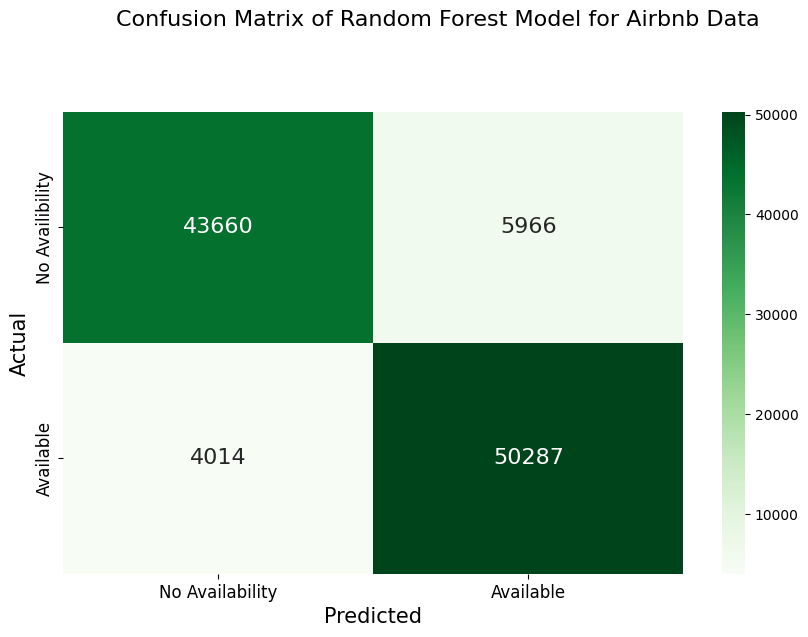

In [147]:
# Creating heatmap of confusion matrix
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 6))
fig.suptitle('Confusion Matrix of Random Forest Model for Airbnb Data', 
             fontsize=16, y=1.05)
ax = plt.subplot()
sns.heatmap(df_cm, annot=True, cmap="Greens", annot_kws={"size": 16}, ax=ax, fmt="g")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('Actual', fontsize=15)
ax.xaxis.set_ticklabels(['No Availability', 'Available'], fontsize=12)
ax.yaxis.set_ticklabels(['No Availibility', 'Available'], fontsize=12, va='center')
plt.show()

In [148]:
df_model_results = pd.concat([model_pred, model_prob], axis = 1 )
df_model_results

,Predict_Log,Prob_NoAvail,Prob_Avail
0,0,0.771861,0.228139
1,1,0.149783,0.850217
2,1,0.382020,0.617980
3,0,0.605368,0.394632
4,1,0.342815,0.657185
...,...,...,...
103922,1,0.168314,0.831686
103923,1,0.415188,0.584812
103924,0,0.645721,0.354279
103925,0,0.781325,0.218675


In [149]:
df_model = pd.concat([X_test, y_test], axis = 1 )
df_model = df_model['cal_available']
df_model = df_model.reset_index()
df_model

,index,cal_available
0,1235948,0
1,1441500,1
2,440382,1
3,731335,0
4,1792531,1
...,...,...
103922,1623376,1
103923,1527210,1
103924,535652,0
103925,450373,0


In [152]:
df_model_results = pd.concat([df_model_results, df_model], axis = 1 )
df_model_results = df_model_results.drop(columns = 'index')
df_model_results

,Predict_Log,Prob_NoAvail,Prob_Avail,cal_available,cal_available,cal_available
0,0,0.771861,0.228139,0,0,0
1,1,0.149783,0.850217,1,1,1
2,1,0.382020,0.617980,1,1,1
3,0,0.605368,0.394632,0,0,0
4,1,0.342815,0.657185,1,1,1
...,...,...,...,...,...,...
103922,1,0.168314,0.831686,1,1,1
103923,1,0.415188,0.584812,1,1,1
103924,0,0.645721,0.354279,0,0,0
103925,0,0.781325,0.218675,0,0,0


# Summary of Random Forest Results and Comments
- Final Model Parameters = model = (max_depth = 9, max_features = 20, n_estimators = 20, class_weight= None, criterion = 'entropy', random_state=21)
- Model Performance = Accuracy Score: 0.7467, Recall Score: 0.7573, Precision Score: 0.7577, ROC AUC Score: 0.8282
- Our final model produced decent predictions. The challenging part of this model was ensuring it wasn't overfitting. Many previous iterations of this model (not included in notebook due to runtime constraints) produced an accuracy score of 1.0, so much tweaking had to be done.
- In a world with more time, more tweaking could have been done to both of the models here, especially when it comes to feature selection. Doing something like a forward selection model would have been useful, but it took too much time to currently be practical.
- I would have also liked to have run cross-validations for both models, but it also took too much time (they were not finished after 30 minutes of runtime) to be practical.
- The data in our dataset would be much more useful if compared to outside data, such as housing prices and proportion of long-term vs. short-term rentals in a neighborhood. These comparisons would help to illustrate the effects of Airbnb rentals on the displacement of long term residents.282